In [ ]:
#This is coded in Google Colab/Jupyter Notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

#######################
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
uploaded = files.upload()
#######################


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving heart.csv to heart (2).csv


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

** Plotting **

<Axes: xlabel='age', ylabel='chol'>

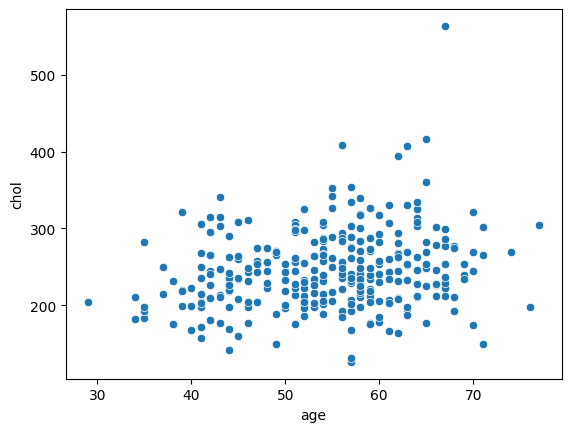

In [ ]:
sns.scatterplot(x='age', y='chol', data=df)

<Axes: xlabel='cp', ylabel='age'>

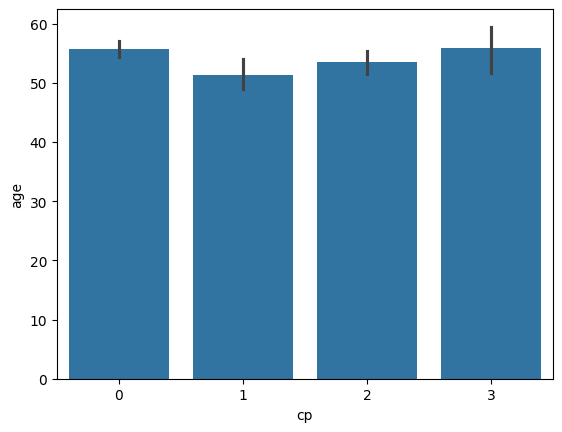

In [ ]:
sns.barplot(x='cp', y='age', data=df)

<Axes: xlabel='output', ylabel='chol'>

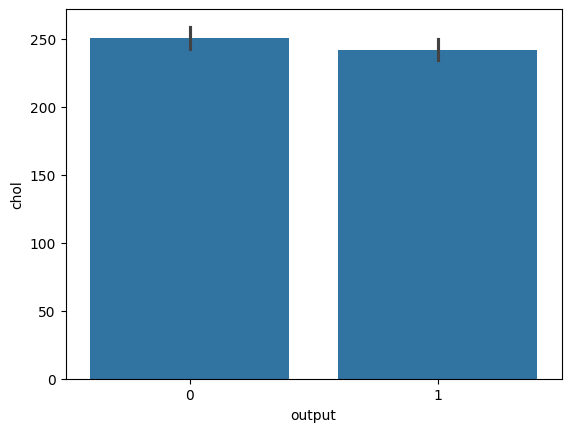

In [ ]:
sns.barplot(x='output',y='chol', data=df)

<Axes: xlabel='output', ylabel='cp'>

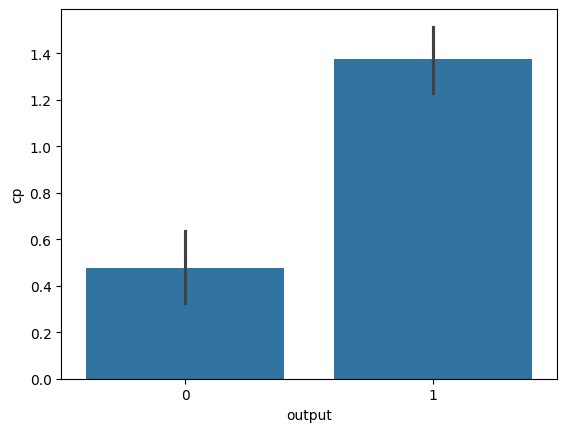

In [ ]:
sns.barplot(x='output',y='cp', data=df)

** Train Test Split **

In [ ]:
x = df.drop('output', axis=1)
y = df['output']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #random state -> normal distribution

In [ ]:
sc = StandardScaler() #scales the values
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

** Logistic Regression **

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
lr.score(x_train, y_train) #relationship between the variables

0.8636363636363636

In [ ]:
yp = lr.predict(x_test)

In [ ]:
c = confusion_matrix(y_test, yp) #it will take y_test and yp and create a matrix
c

array([[25,  4],
       [ 5, 27]])

<Axes: >

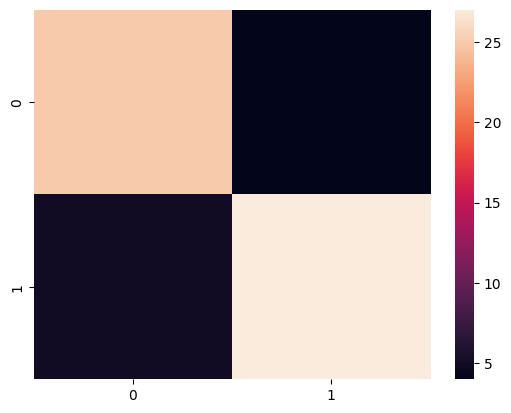

In [ ]:
sns.heatmap(c)

** SVC **

In [ ]:
sv = SVC()

In [ ]:
sv.fit(x_train, y_train)

SVC()

In [ ]:
sv.score(x_test, y_test)

0.8688524590163934

** Random Forest Classifer **

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.fit(x_train, y_train) #fit training data

RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.score(x_test, y_test) #scores the variables and we can compare with other scores

0.8524590163934426

In [ ]:
#check the values
from sklearn.model_selection import cross_val_score


In [ ]:
rfm = cross_val_score(rfc, x_train, y_train, cv=10)

In [ ]:
rfm.mean() #the net accuracy of the random forest

0.8098333333333334

** K Nearest Neighbor **

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kn = KNeighborsClassifier(n_neighbors=5) #how many data points to consider

In [ ]:
kn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
kn.score(x_test, y_test)

0.9016393442622951

In [ ]:
df.head(1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [ ]:
a = [[52,0,2,140,230,1,0,160,1,2,7,0,0]]
kn.predict(a) #0 = no risk of heart attack, 1 = risk of heart attack

array([1])

In [ ]:
b = [[29,1,0,120,190,0,1,130,1,1.3,0,0,0]] #the model predicts the chance of a heart attack with a 90% accuracy rate
kn.predict(b)

array([1])

** Data Visualization **

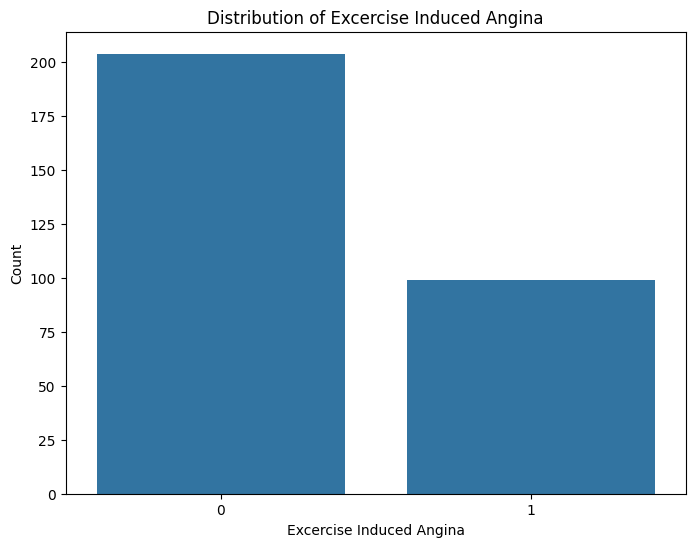

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='exng', data=df)
plt.title('Distribution of Excercise Induced Angina')
plt.xlabel('Excercise Induced Angina')
plt.ylabel('Count')
plt.show()

The x-axis represents the presence (1) or absence (0) of excercised-induced angina. The y-axis represents the count of patients. This visualization helps us understand the proportion of patients that experienced or did not experienced excercise-induced angina in the dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

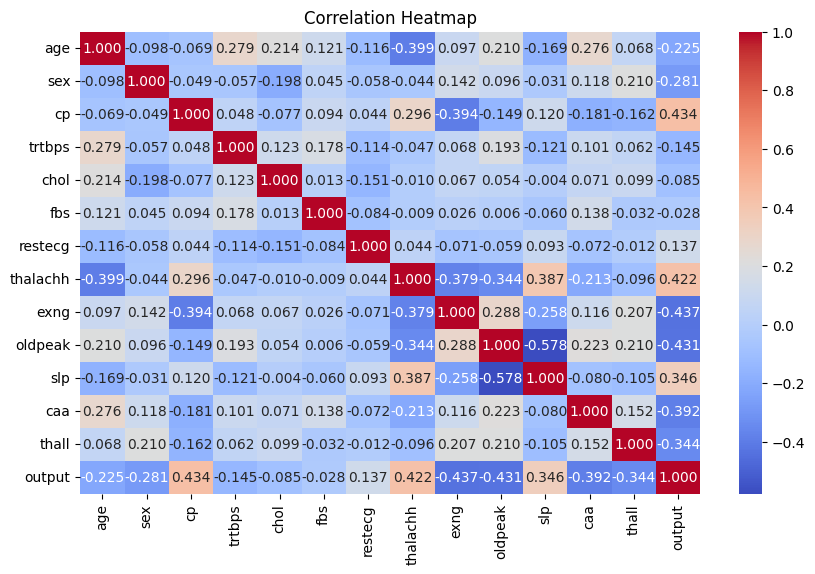

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Heatmap')
plt.show

The heatmap displays the correlation coefficients between various variables in the dataset. Each cell represents the strenght and direction of the correlation. Positive values indicate a positive correlation while negative values denote a negative correlation. This visualization helps us identify which factors have a significant impact on heart disease.

<function matplotlib.pyplot.show(close=None, block=None)>

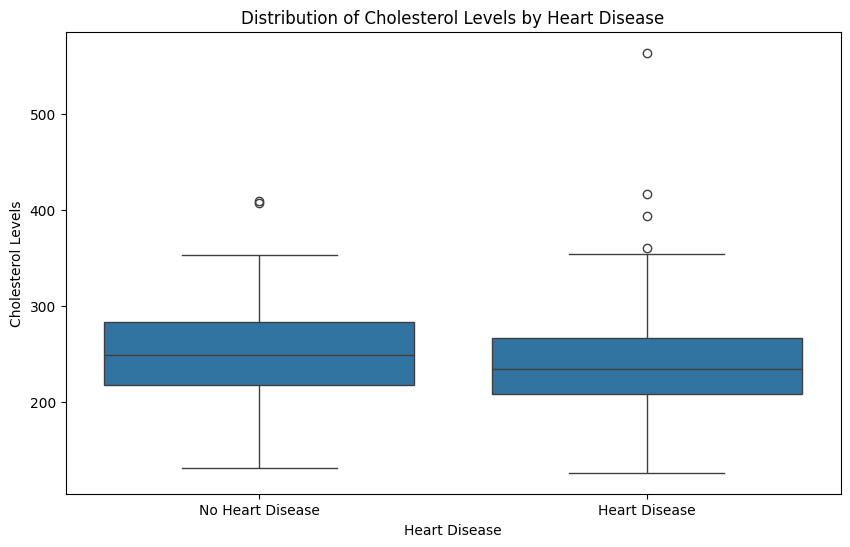

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='output', y='chol', data=df)
plt.title('Distribution of Cholesterol Levels by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol Levels')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

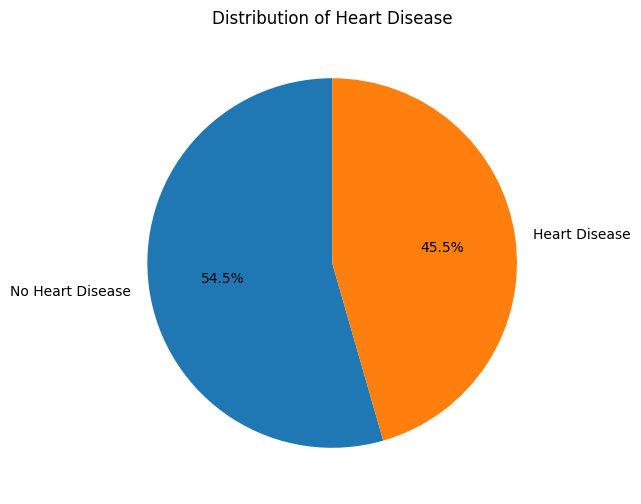

In [ ]:
plt.figure(figsize=(10,6))
heart_disease = df['output'].value_counts()
plt.pie(heart_disease, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Heart Disease')
plt.show